In [11]:
from google.colab import drive ; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/drive/My Drive/DataSet/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
df = df.drop("User ID" , axis = 1)

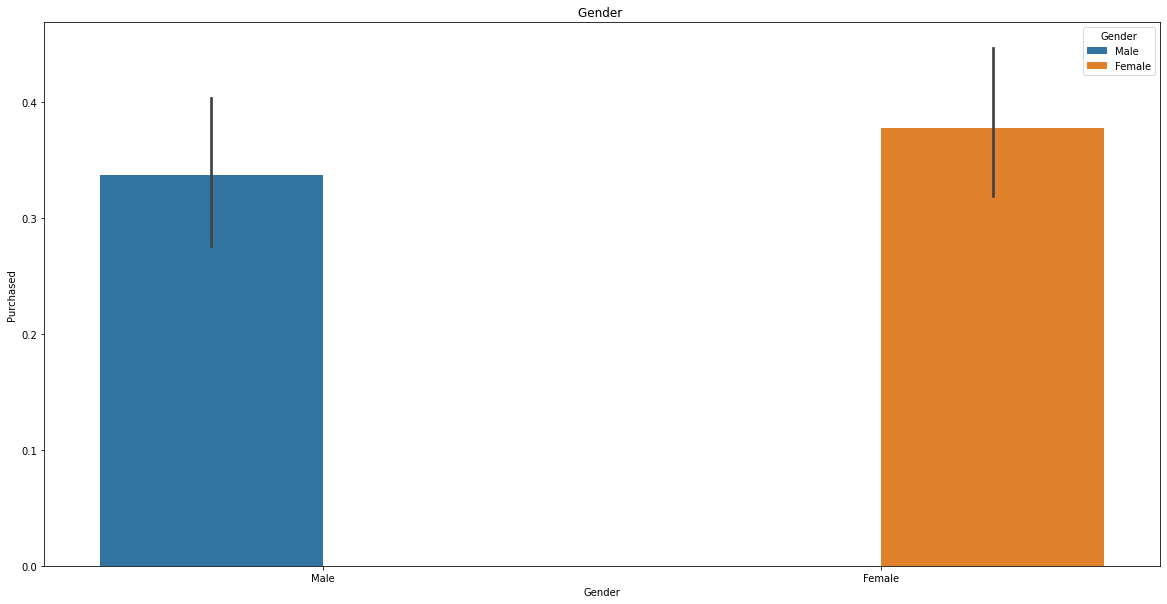

In [15]:
f,ax = plt.subplots(ncols = 1, figsize=(20,10))
ax.set(title = "Gender " , xlabel = "Purchased")
sns.barplot(y = "Purchased" , x = "Gender" , data=df , hue ="Gender", ax = ax)

43

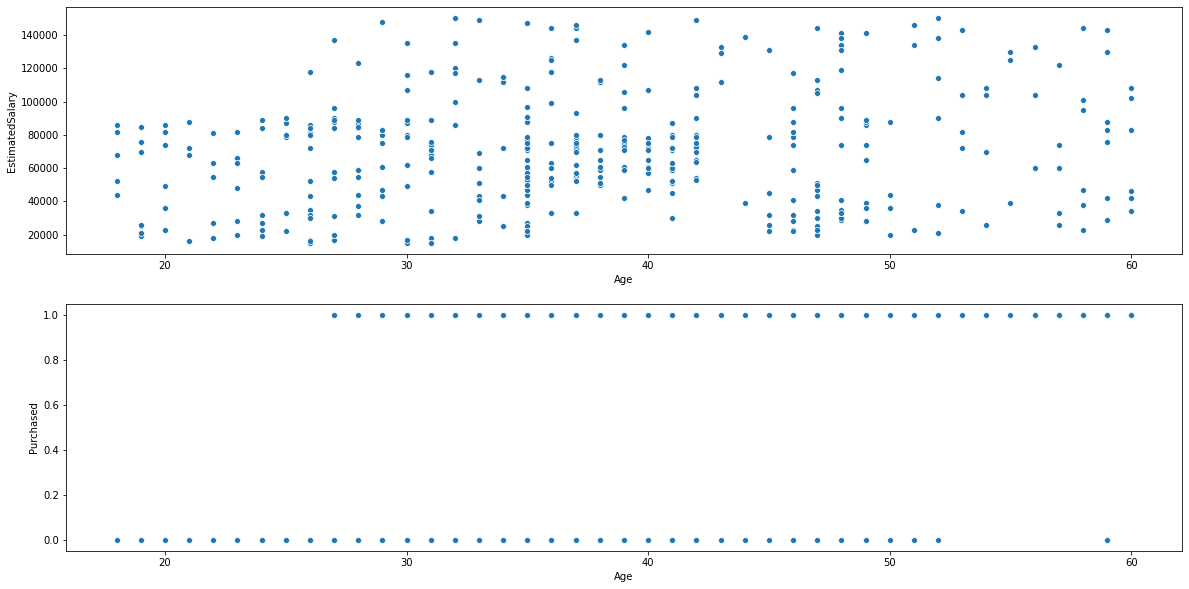

In [16]:
f,ax = plt.subplots (nrows= 2 , figsize = (20,10 ))
sns.scatterplot(x ="Age" , y = "EstimatedSalary"  , data = df , ax = ax[0])
sns.scatterplot(y ="Purchased" , x="Age" , data = df , ax=ax[1] )

len(df.loc[ ( df["Purchased"] == 0 ) &  ( df["Age"] < 25 )] )

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Sc = StandardScaler()
df["Gender"].replace({"Male" : 0 , "Female" : 1 } ,inplace=True) 
df[["EstimatedSalary","Age"]] = pd.DataFrame(data = Sc.fit_transform(df[["EstimatedSalary", "Age"]]) ,columns =["EstimatedSalary","Age"] )
df.head() 





,Gender,Age,EstimatedSalary,Purchased
0,0,-1.781797,-1.490046,0
1,0,-0.253587,-1.460681,0
2,1,-1.113206,-0.785290,0
3,1,-1.017692,-0.374182,0
4,0,-1.781797,0.183751,0


In [18]:
for iteration in df.columns:
  print("Skew  {} {} ".format(iteration,df[iteration].skew()) )

Skew  Gender -0.04015875487679989 
Skew  Age 0.23133746309642825 
Skew  EstimatedSalary 0.4950236288899361 
Skew  Purchased 0.596902836080957 


In [20]:
features = df.drop("Purchased" , axis = 1)
target = df["Purchased"]
x_train,x_test,y_train,y_test = train_test_split (features , target ,test_size = 0.2 )
Model = LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

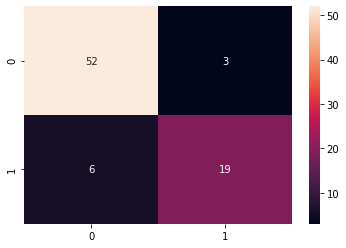

In [26]:
y_pred = Model.predict(x_test)

cf = confusion_matrix(y_test,y_pred )

sns.heatmap(cf , annot = True ,annot_kws={"size" : 10})
